In [188]:
import numpy as np
import random
from scipy import optimize
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

%matplotlib inline

**Сгенерируем датасет** из 500 точек на плоскости, для которых $y = 0.5x + 1 + \varepsilon$, где $\varepsilon \sim N(0, 0.2)$.

In [211]:
dataset = [0.5 * x + 1 + random.gauss(0, 0.2) for x in range(500)]

1) **Визуализируем выборку**

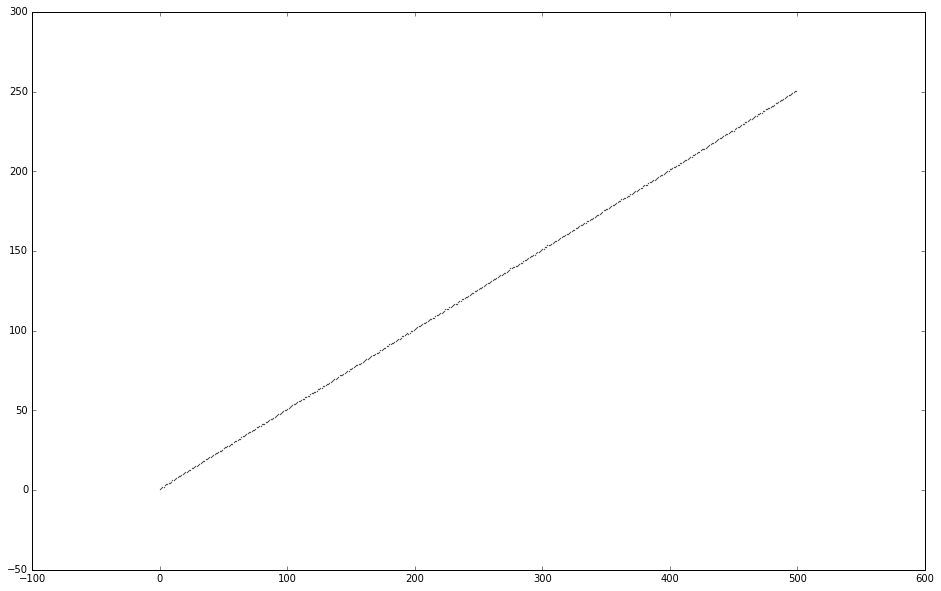

In [190]:
plt.figure(figsize=(16, 10))
plt.scatter(range(len(dataset)), dataset, s=0.1)
plt.show()

2) Восстановим по выборке зависимость $y(x)$, считая, что зависимость имеет вид $y = kx + b$.

In [191]:
result = optimize.minimize(
    lambda k: metrics.mean_squared_error(
        [k[0] * x + k[1] for x in range(500)], 
        dataset
    ), 
    np.array([0, 0])
)
print(result)

      fun: 0.04017497488165726
 hess_inv: array([[  2.40000977e-05,  -5.98802452e-03],
       [ -5.98802452e-03,   1.99401217e+00]])
      jac: array([ -1.67638063e-08,   2.37487257e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.49989468,  1.0174781 ])


Визуализируем восстановленную прямую.

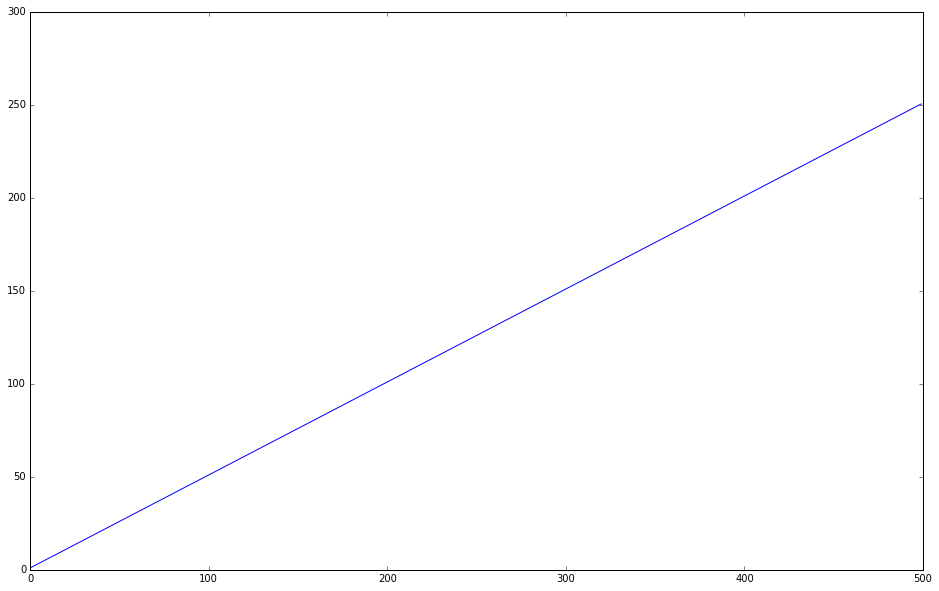

In [192]:
plt.figure(figsize=(16, 10))
plt.plot([result.x[0] * t + result.x[1] for t in range(500)])
plt.show()

Вот так это выглядит в крупном масштабе.

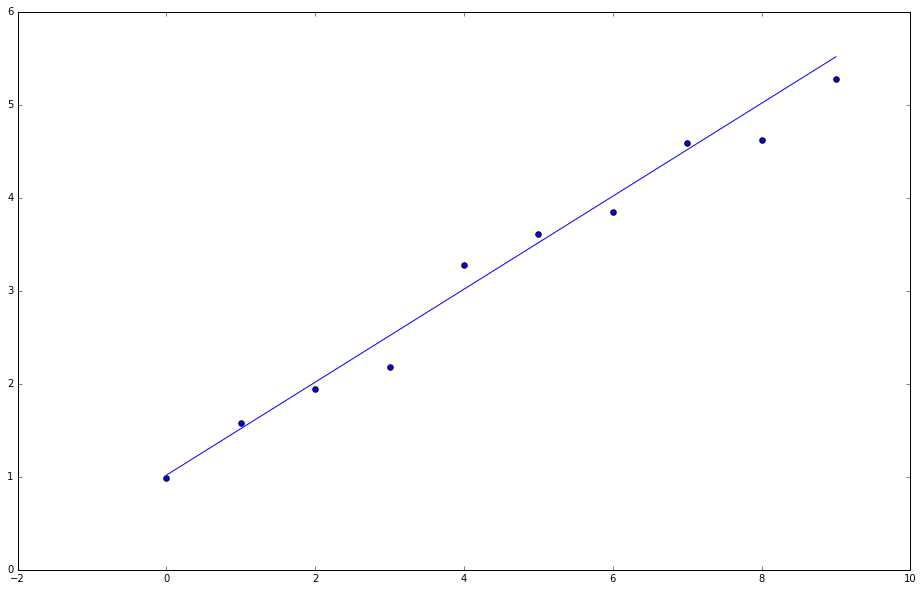

In [193]:
plt.figure(figsize=(16, 10))
plt.scatter(range(len(dataset[:10])), dataset[:10], s=30)
plt.plot([result.x[0] * t + result.x[1] for t in range(10)])
plt.show()

3) **Добавим в выборку 75 точек**, для которых $y = -1 + \varepsilon$, а $x$ принимает различные значения из диапазона (0, 500).

In [231]:
x_axis = np.concatenate((np.arange(0, 75, 0.5), np.arange(75, 500, 1)))

In [213]:
dataset_new = []
i = 0
for x in x_axis:
    if int(x) == x:
        dataset_new.append(dataset[i])
        i = i + 1
    else:
        dataset_new.append(-1 + random.gauss(0, 0.2))

Попробуем снова восстановить зависимость $y = kx + b$ по новой выборке. Используем сначала $MSE$.

In [257]:
result_mse = optimize.minimize(
    lambda k: metrics.mean_squared_error(
        [k[0] * x + k[1] for x in x_axis], 
        dataset_new
    ), 
    np.array([0, 0])
)
print(result_mse)

      fun: 54.731364566394483
 hess_inv: array([[  3.15296896e-08,  -3.44535459e-08],
       [ -3.44535459e-08,   1.62314680e-07]])
      jac: array([  1.81198120e-05,   3.81469727e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 722
      nit: 5
     njev: 175
   status: 2
  success: False
        x: array([ 0.5201519 , -6.16895389])


Получилось не очень. Теперь попробуем использовать $MAE$.

In [256]:
result_mae = optimize.minimize(
    lambda k: metrics.mean_absolute_error(
        [k[0] * x + k[1] for x in x_axis], 
        dataset_new
    ), 
    np.array([0, 0])
)
print(result_mae)

      fun: 2.830655235814037
 hess_inv: array([[  1.10845866e-06,   1.75088412e-05],
       [  1.75088412e-05,   2.75187327e-01]])
      jac: array([ 0.30651277,  0.00129536])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 432
      nit: 12
     njev: 105
   status: 2
  success: False
        x: array([ 0.50050364,  0.83929556])


Получилось гораздо лучше. Отобразим теперь результаты на плоскости.

*Комментарий: тут не вся выборка, чтобы были видны точки.*

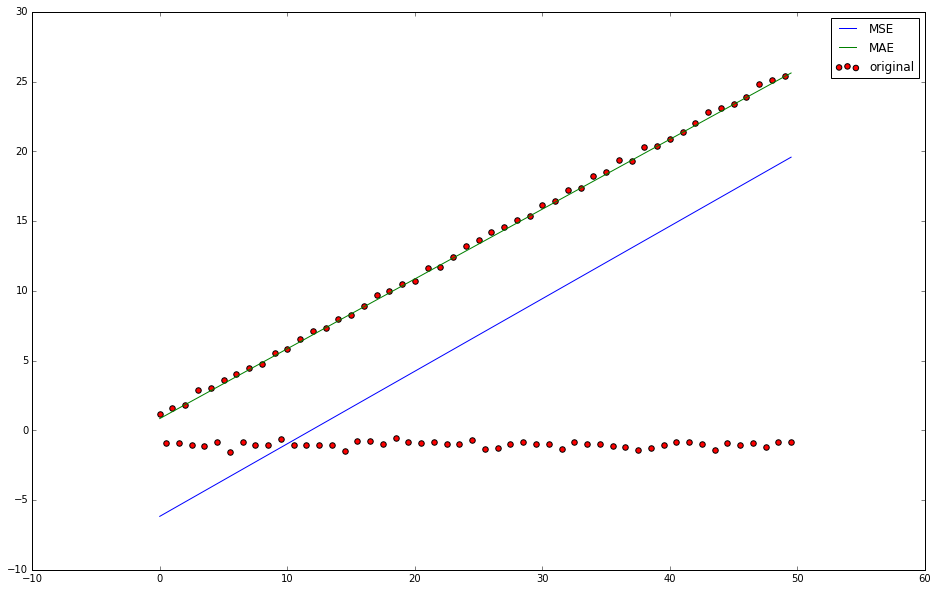

In [247]:
plt.figure(figsize=(16, 10))
plt.scatter(x_axis[:100], dataset_new[:100], s=30, c='r', label='original')
plt.plot(x_axis[:100], [result_mse.x[0] * t + result_mse.x[1] for t in x_axis[:100]], c='b', label='MSE')
plt.plot(x_axis[:100], [result_mae.x[0] * t + result_mae.x[1] for t in x_axis[:100]], c='g', label='MAE')
plt.legend()
plt.show()

4) Таким образом, **MAE более устойчив к выбросам**.